# Homework 7: Correlation, Regression, and Least Squares

This assignment is due Friday, May 29 at 11:59PM. Directly sharing answers is not okay, but discussing problems with course staff or with other students is encouraged.

Reading:
- Textbook chapter [12](https://www.inferentialthinking.com/chapters/12/why-the-mean-matters.html) (for review)
- Textbook chapter [13](https://www.inferentialthinking.com/chapters/13/prediction.html)

Run the cell below to prepare the notebook.

In [1]:
# Run this cell to set up the notebook, but please don't change it.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
from matplotlib import patches
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

# Don't change this cell; just run it. 
from client.api.notebook import Notebook
ok = Notebook('hw07.ok')
ok.auth(inline=True);

/usr/local/lib/python3.8/site-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.8/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/usr/local/lib/python3.8/site-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


Assignment: Homework 7: Correlation, Regression, and Least Squares
OK, version v1.14.20



ERROR  | auth.py:102 | {'error': 'invalid_grant'}



Open the following URL:

https://okpy.org/client/login/

After logging in, copy the code from the web page and paste it into the box.
Then press the "Enter" key on your keyboard.

Paste your code here: gpv7lFdMwLXwQGcdkbxiriC6bAPJze
Successfully logged in as A01631920@itesm.mx


When you are finished, run the following cell to submit your work.

In [74]:
ok.submit();

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw07.ipynb'.
Submit... 100% complete
Submission successful for user: A01631920@itesm.mx
URL: https://okpy.org/tec/tc2031/sp20/hw07/submissions/rmE47p



## 1. Evaluating NBA Game Predictions


#### A brief introduction to sports betting
In a basketball game, each team scores some number of points.  Conventionally, the team playing at its own arena is called the "home team," and the other team is called the "away team."  The winner is the team with the most points.

We can summarize what happened in a game by the "**outcome**", defined as the **the away team's score minus the home team's score**:

$$\text{outcome} = \text{points scored by the away team} - \text{points scored by the home team}$$

If this number is positive, the away team won.  If it's negative, the home team won. 

Casinos in Las Vegas offer bets on the outcomes of NBA games.  One kind of bet works like this:

1. The casino decides on a "spread."
2. You can bet \$11 that the outcome will be above the spread, or \$11 that the outcome will be below the spread.
3. After the game, you end up with \$21 if you guessed correctly, and \$0 if you guessed incorrectly.

The analysts at the casino try to choose the spread so that (according to their analysis of the teams) there is a 50% chance that the outcome will be below that amount, and a 50% chance that the outcome will be above that amount.

**[tl;dr](https://en.wikipedia.org/wiki/Wikipedia:Too_long;_didn%27t_read): The spread is the casino's best guess at the outcome (the away team's score minus the home team's score).**

The table `spreads` contains spreads from the betting website [Covers](http://www.covers.com) from every game in the 2014 NBA season, plus actual game outcomes.  

In [2]:
spreads = Table.read_table("spreads.csv")
spreads

Date,Home Team,Away Team,Home Points,Away Points,Outcome,Spread
4/10/2015,Utah,Memphis,88,89,1,2.5
3/10/2015,Utah,New York,87,82,-5,-13
11/19/2014,Indiana,Charlotte,88,86,-2,-2
11/15/2014,Chicago,Indiana,90,99,9,-9
3/25/2015,Utah,Portland,89,92,3,-2
3/3/2015,Memphis,Utah,82,93,11,-7
3/18/2015,Utah,Washington,84,88,4,-3
3/16/2015,Utah,Charlotte,94,66,-28,-4.5
1/24/2015,Charlotte,New York,76,71,-5,-9
11/7/2014,Oklahoma City,Memphis,89,91,2,7


Here's a scatter plot of the outcomes and spreads, with the spreads on the horizontal axis.

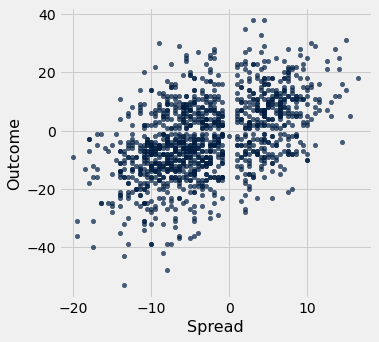

In [3]:
spreads.scatter("Spread", "Outcome")

#### Question 1
Why do you think that the spread and outcome are never 0 (aside from 1 case of the spread being 0)? 

It means that games cant end in a tied score

Let's investigate how well the casinos are predicting game outcomes.

One question we can ask is: Is the casino's prediction correct on average? In other words, for every value of the spread, is the average outcome of games assigned that spread equal to the spread? If not, the casino would apparently be making a systematic error in its predictions.

#### Question 2
Among games with a spread around 5, from 3.5 to 6.5 (including both 3.5 and 6.5), what was the average outcome? 

*Hint:* Read the [documentation for the predicate `are.between_or_equal_to`](http://data8.org/datascience/predicates.html#datascience.predicates.are.between_or_equal_to).

In [5]:
spreads_around_5 = spreads.where("Spread", are.between(3.5, 6.5))
spread_5_outcome_average = np.average(spreads_around_5.column(6))
print("Average outcome for spreads around 5:", spread_5_outcome_average)

Average outcome for spreads around 5: 4.651408450704225


In [6]:
_ = ok.grade('q1_2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 3
If the average outcome for games with any given spread turned out to be exactly equal to that spread, what would the slope and intercept of the linear regression line be, in original units?

In [7]:
expected_slope_for_equal_spread = 1
expected_intercept_for_equal_spread = 0

In [8]:
_ = ok.grade('q1_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 4
Fix the `standard_units` function below.  It should take an array of numbers as its argument and return an array of those numbers in standard units.

In [9]:
def standard_units(nums):
    """Return an array where every value in nums is converted to standard units."""
    return (nums-np.average(nums))/np.std(nums)

In [10]:
_ = ok.grade('q1_4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 5
Compute the correlation between outcomes and spreads using the `standard_units` function.

In [54]:
spread_r = np.mean(standard_units(spreads.column("Spread"))*standard_units(spreads.column("Outcome")))
spread_r

0.49181413688314235

In [55]:
_ = ok.grade('q1_5')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 6
Compute the slope of the least-squares linear regression line that predicts outcomes from spreads, in original units.

In [56]:
spread_slope = spread_r*np.std(spreads.column("Outcome"))/np.std(spreads.column("Spread"))
spread_slope

0.9539269682264327

In [57]:
_ = ok.grade('q1_6')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 7
For the "best fit" line that estimates the average outcome from the spread, the slope is less than 1. Does knowing the slope alone tell you whether the average spread was higher than the average outcome? If so, set the variable name below to `True`. If you think you need more information than just the slope of the regression line to answer that question, then respond `False`. Briefly justify your answer below.

In [58]:
slope_implies_average_spread_above_average_outcome = False

There isnt enough information to tell the relationshib between x and y

In [59]:
_ = ok.grade('q1_7')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## 2. Finding the Least Squares Regression Line


In this exercise, you'll work with a small invented data set.  Run the next cell to generate the dataset `d` and see a scatter plot.

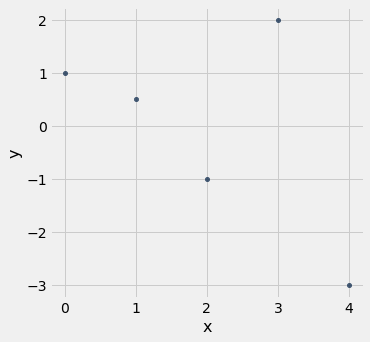

In [60]:
d = Table().with_columns(
    'x', make_array(0,  1,  2,  3,  4),
    'y', make_array(1, .5, -1,  2, -3))
d.scatter('x')


#### Question 1 (Ungraded, but you'll need the result later)
Running the cell below will generate sliders that control the slope and intercept of a line through the scatter plot.  When you adjust a slider, the line will move.

By moving the line around, make your best guess at the least-squares regression line.  (It's okay if your line isn't exactly right, as long as it's reasonable.)

**Note:** Python will probably take about a second to redraw the plot each time you adjust the slider.  We suggest clicking the place on the slider you want to try and waiting for the plot to be drawn; dragging the slider handle around will cause a long lag.

In [61]:
def plot_line(slope, intercept):
    plt.figure(figsize=(5,5))
    
    endpoints = make_array(-2, 7)
    p = plt.plot(endpoints, slope*endpoints + intercept, color='orange', label='Proposed line')
    
    plt.scatter(d.column('x'), d.column('y'), color='blue', label='Points')
    
    plt.xlim(-4, 8)
    plt.ylim(-6, 6)
    plt.gca().set_aspect('equal', adjustable='box')
    
    plt.legend(bbox_to_anchor=(1.8, .8))
    plt.show()

interact(plot_line, slope=widgets.FloatSlider(min=-4, max=4, step=.1), intercept=widgets.FloatSlider(min=-4, max=4, step=.1));

interactive(children=(FloatSlider(value=0.0, description='slope', max=4.0, min=-4.0), FloatSlider(value=0.0, d…

<div class="hide">\pagebreak</div>

You can probably find a reasonable-looking line by just eyeballing it.  But remember: the least-squares regression line minimizes the mean of the squared errors made by the line for each point.  Your eye might not be able to judge squared errors very well.

#### A note on mean and total squared error

It is common to think of the least-squares line as the line with the least *mean* squared error (or the square root of the mean squared error), as the textbook does.

But it turns out that it doesn't matter whether you minimize the mean squared error or the *total* squared error.  You'll get the same best line in either case.

That's because the total squared error is just the mean squared error multipled by the number of points (`d.num_rows`).  So if one line gets a better total squared error than another line, then it also gets a better mean squared error.  In particular, the line with the smallest total squared error is also better than every other line in terms of mean squared error.  That makes it the least squares line.

**tl; dr:** Minimizing the mean squared error minimizes the total squared error as well.

#### Question 2 (Ungraded, but you'll need the result later)
The next cell produces a more useful plot.  Use it to find a line that's closer to the least-squares regression line, keeping the above note in mind.

In [62]:
def plot_line_and_errors(slope, intercept):
    plt.figure(figsize=(5,5))
    points = make_array(-2, 7)
    p = plt.plot(points, slope*points + intercept, color='orange', label='Proposed line')
    ax = p[0].axes
    
    predicted_ys = slope*d.column('x') + intercept
    diffs = predicted_ys - d.column('y')
    for i in np.arange(d.num_rows):
        x = d.column('x').item(i)
        y = d.column('y').item(i)
        diff = diffs.item(i)
        
        if diff > 0:
            bottom_left_x = x
            bottom_left_y = y
        else:
            bottom_left_x = x + diff
            bottom_left_y = y + diff
        
        ax.add_patch(patches.Rectangle(make_array(bottom_left_x, bottom_left_y), abs(diff), abs(diff), color='red', alpha=.3, label=('Squared error' if i == 0 else None)))
        plt.plot(make_array(x, x), make_array(y, y + diff), color='red', alpha=.6, label=('Error' if i == 0 else None))
    
    plt.scatter(d.column('x'), d.column('y'), color='blue', label='Points')
    
    plt.xlim(-4, 8)
    plt.ylim(-6, 6)
    plt.gca().set_aspect('equal', adjustable='box')
    
    plt.legend(bbox_to_anchor=(1.8, .8))
    plt.show()

interact(plot_line_and_errors, slope=widgets.FloatSlider(min=-4, max=4, step=.1), intercept=widgets.FloatSlider(min=-4, max=4, step=.1));

interactive(children=(FloatSlider(value=0.0, description='slope', max=4.0, min=-4.0), FloatSlider(value=0.0, d…

#### Question 3
Describe the visual criterion you used to find a line in question 2.  (For example, a possible (but incorrect) answer is, "I tried to make the red line for the bottom-right point as small as possible.")

It was used to make sure the error was being menimized, and the red boxes (squared error), represents the error in the graph

#### Question 4
We can say that a point influences the line by how much the line would move if the point were removed from the data set. Does the point at (3, 2) have more or less influence than any other point on the location of the line? 

It has more influence

Now, let's have Python find this line for us.  When we use `minimize`, Python goes through a process similar to the one you might have used in question 2.

But Python can't look at a plot that displays errors!  Instead, we tell it how to find the total squared error for a line with a given slope and intercept.

#### Question 5
Define a function called `total_squared_error`.  It should take two numbers as arguments:

1. the slope of some potential line
2. the intercept of some potential line

It should return the total squared error when we use that line to make predictions for the dataset `d`.

In [63]:
def total_squared_error(slope, intercept):
    # Hint: The staff answer computed an array called predictions
    # and an array called errors first.
    predictions = slope*d.column(0)+intercept
    errors = d.column(1)-predictions
    return sum(errors**2)

In [64]:
_ = ok.grade('q2_5')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 6
What is the total squared error for the line you found by "eyeballing" the errors in Question 1?  What about Question 2, where you made a guess that was "aided" by a visualization of the squared error?  (It's okay if the error went up, but for many students, the error will go down when using the visual aid.)

In [65]:
eyeballed_error = total_squared_error(-0.5, 1.2)
aided_error = total_squared_error(-1, 2.3)
print("Eyeballed error:", eyeballed_error, "\nAided error:", aided_error)

Eyeballed error: 11.649999999999999 
Aided error: 12.999999999999998


In [66]:
_ = ok.grade('q2_6')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 7
Use `minimize` to find the actual slope and intercept of the least-squares regression line.

**Note:** `minimize` will return a single array containing the slope as the first element and intercept as the second. Read more of its documentation [here](http://data8.org/datascience/util.html?highlight=minimize#datascience.util.minimize).

In [69]:
# The staff solution used 1 line of code above here.
slope_from_minimize = minimize(total_squared_error)[0]
intercept_from_minimize = minimize(total_squared_error)[1]
print("Least-squares regression line: predicted_y =",
      slope_from_minimize,
      "* x + ",
      intercept_from_minimize)

Least-squares regression line: predicted_y = -0.6498374231570391 * x +  1.1988619620992735


In [70]:
_ = ok.grade('q2_7')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 8
What was the total squared error for that line?

In [71]:
best_total_squared_error = sum((d.column("x") * slope_from_minimize + intercept_from_minimize - d.column("y"))**2)
best_total_squared_error

10.975003568216033

In [72]:
_ = ok.grade('q2_8')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Finally, run the following cell to plot this "best fit" line and its errors:

In [22]:
plot_line_and_errors(slope_from_minimize, intercept_from_minimize)

## 3. Triple Jump Distances vs. Vertical Jump Heights


Does skill in one sport imply skill in a related sport?  The answer might be different for different activities.  Let us find out whether it's true for the [triple jump](https://en.wikipedia.org/wiki/Triple_jump) (an horizontal jump similar to a long jump) and the vertical jump.  Since we're learning about linear regression, we will look specifically for a *linear* association between skill in the two sports.

The following data was collected by observing 40 collegiate level soccer players.  Each athlete's distance in both jump activities was measured in centimeters. Run the cell below to load the data.

In [25]:
# Run this cell to load the data
jumps = Table.read_table('triple_vertical.csv')
jumps

triple,vertical
383,33
781,71.1
561.62,62.25
624.52,61.33
446.24,40.19
515.3,38.96
449.22,39.69
560.91,46.51
519.12,37.68
595.38,53.48


#### Question 1
Before running a regression, it's important to see what the data look like, because our eyes are good at picking out unusual patterns in data.  Draw a scatter plot with the triple jump distances on the horizontal axis and the vertical jump heights on vertical axis **that also shows the regression line**. 

See the [documentation for `scatter`](http://data8.org/datascience/_autosummary/datascience.tables.Table.scatter.html#datascience.tables.Table.scatter) for instructions on how to have Python draw the regression line automatically.

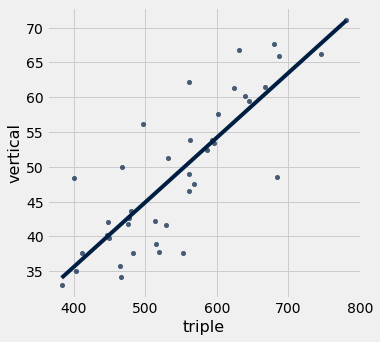

In [26]:
jumps.scatter("triple", "vertical", fit_line=True)

**Question 2** Does the correlation coefficient `r` look closer to 0, .5, or -.5? Explain. 

The diagram is cluster around a line with an upward slope, this means it is closer to .5

#### Question 3
Create a function called `regression_parameters`. It takes as its argument a table with two columns.  The first column is the x-axis, and the second column is the y-axis.  It should compute the correlation between the two columns, then compute the slope and intercept of the regression line that predicts the second column from the first, in original units (centimeters).  It should return an array with three elements: the correlation coefficient of the two columns, the slope of the regression line, and the intercept of the regression line.

In [39]:
def regression_parameters(t):
    # Our solution had 4 lines above this one
    col_0 = t.column(0)
    col_1 = t.column(1)
    mean_x = np.mean(col_0)
    mean_y = np.mean(col_1)
    std_x = np.std(col_0)
    std_y = np.std(col_1)
    r = np.mean(standard_units(col_0)*standard_units(col_1))
    slope = r*(std_y/std_x)
    intercept = mean_y - slope * mean_x
    return np.array([r, slope, intercept])

# When your function is finished, the next lines should
# compute the regression line predicting vertical jump 
# distances from triple jump distances.
parameters = regression_parameters(jumps)
parameters
print('r:', parameters.item(0), '; slope:', parameters.item(1), '; intercept:', parameters.item(2))

r: 0.8343076972837598 ; slope: 0.09295728160512184 ; intercept: -1.566520972963474


In [40]:
_ = ok.grade('q3_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 4
Let's use `regression_parameters` to predict what certain athletes' vertical jump heights would be given their triple jump distances.

The world record for the triple jump distance is 18.29 *meters* by Johnathan Edwards. What's our prediction for what Edwards' vertical jump would be?

In [42]:
triple_record_vert_est = (parameters.item(1)*1829 + parameters.item(2))
print("Predicted vertical jump distance: {:f} centimeters".format(triple_record_vert_est))

Predicted vertical jump distance: 168.452347 centimeters


In [43]:
_ = ok.grade('q3_4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



#### Question 5
Do you expect this estimate to be accurate within a few centimeters? Why or why not?

It is not accurate as edwards jump is much larger than any other triple jump in the table

## 4. Testing Relationship Ratings


Throughout this part of the homework, we will be interested in learning how different factors can contribute to the rating couples give their relationship, on a scale of 1-5 (1 being most satisfied, and 5 being the least). 

To do this, we will be looking at the table that is loaded below. 

**Note:** The data in this table is quite dated. It only includes heterosexual relationships. A better dataset would contain a more accurate sample of couples. When drawing conclusions from data, it is important to be aware of biases that exist in the dataset.

In [73]:
couples = Table.read_table('couples.csv')
couples 

ID,Gender,Marital Status,Relationship Rating,Age,Education,Household Income,Employment Status
0,male,married,1,51,Bachelor's degree,"75,000 to 84,999",working as paid employee
0,female,married,1,53,High school graduate - diploma or the equivalent (GED),"75,000 to 84,999",working as paid employee
1,male,married,1,57,Associate degree,"85,000 to 99,999",working as paid employee
1,female,married,1,57,High school graduate - diploma or the equivalent (GED),"85,000 to 99,999",working as paid employee
2,male,married,1,60,Bachelor's degree,"75,000 to 84,999",working as paid employee
2,female,married,1,57,"Some college, no degree","75,000 to 84,999",working as paid employee
3,male,married,1,62,High school graduate - diploma or the equivalent (GED),"35,000 to 39,999","working, self-employed"
3,female,married,1,59,High school graduate - diploma or the equivalent (GED),"35,000 to 39,999",working as paid employee
4,male,married,2,53,"Some college, no degree","125,000 to 149,999",not working - other
4,female,married,2,61,"Some college, no degree","125,000 to 149,999",not working - retired


Looking at the table above, we note that we should be able to test whether different factors can affect the relationship rating, from age to education. To begin, we are first going to investigate whether marital status has an effect on relationship rating. In order to accomplish this, we are going to do a permutation test! 

<div class="hide">\pagebreak</div>
**Question 1** 

State the null and alternative hypothesis for such a test (assume we aren't trying to figure out ***how*** marital status affects relationship rating, just whether or not it does). 

**Answer:**

Null hypothesis:

Alternate hypothesis:

<div class="hide">\pagebreak</div>
**Question 2** 

Before we continue, we will have to talk about the notion of a contingency table. 

Define `contingency` to be a table where the rows represent unique values of the relationship ratings, the columns represent the unique values of marital status present in the table, and the values in each cell represent the number of individuals with a given marital status and relationship rating.

*Hint:* Use `pivot`.

In [44]:
contingency = ...
contingency

In [45]:
_ = ok.grade('q4_2')

<div class="hide">\pagebreak</div>
**Question 3** 

It is difficult to identify a pattern in the above table, since our table has so many more married people than it does unmarried. To rectify this, we will instead compute proportions. 

Assign `contingency_prop` to a table with the same columns and rows, but the values are instead in proportions, i.e. the value in the cell corresponding to a relationship rating of 1 and marital status of "married" should be the proportion of married people who gave their relationship a 1. 

In [46]:
#The staff solution took 5 lines
contingency_prop = ...

<div class="hide">\pagebreak</div>
**Question 4** 

Assign `tvd_marriages` to the total variational distance between the distributions of married people's relationship ratings and unmarried people's relationship ratings. 

In [49]:
tvd_marriages = ...
tvd_marriages

In [50]:
_ = ok.grade('q4_4')

<div class="hide">\pagebreak</div>
**Question 5** 

Let's get more general now. Define `tvd` which takes in 

- any table like `couples`
- `conditions`: the name of a column like Relationship Rating
- `values`: the name of a column like Marital Status

The function should return the total variation distance between the distribution of conditions in the first unique value of `values` and the distribution of conditions in the second unique value of `values` (assume there are only two unique values)

***Hint***: This looks daunting, but you are just generalizing your code from above. 

In [51]:
def tvd(t, conditions, values):
    return ...

tvd(couples, 'Relationship Rating', 'Marital Status')

<div class="hide">\pagebreak</div>
**Question 6** 

Now that we have a valid test statistic, fill in the implementation of `permutation_test` below. It should run a permutation test to check whether conditions and values are related, where conditions and values are defined as above. See section [16.1](https://www.inferentialthinking.com/chapters/16/1/two-categorical-distributions.html) for details about the permutation test.

The inputs to the function are:

- `t`: a table containing our data
- `conditions`: the name of the column in `t` representing our conditions
- `values`: the name of the column in `t` representing our values
- `repetitions`: the number of permutations we'd like to test
- `statistic`: a test statistic function (such as `tvd`). 

The return value should be the p-value of seeing the observed value assuming the null hypothesis. Fill in the implementation as necessary; we have also provided code which allows you to see an empirical histogram of the distribution under the null. 

In [53]:
def permutation_test(t, conditions, values, repetitions , statistic):
    stats = ...

    for i in np.arange(repetitions):
        shuffled = ...
        shuffled_table = Table().with_columns(conditions, t.column(conditions), values, shuffled.column(values))
        stats = ...    

    observation = ...
    p_value = ...
    
    Table().with_column('Empirical distribution of TVD', stats).hist(bins=np.arange(-.02, .12, .02))
    return p_value 

permutation_test(couples, 'Relationship Rating', 'Marital Status', 200, tvd)

<div class="hide">\pagebreak</div>
**Question 7** 

Based on the above method, should we reject the null hypothesis that the relationship ratings and marital status are uncorrelated, or should we fail to reject? Why?


*Write your answer here, replacing this text.*

<div class="hide">\pagebreak</div>

In [ ]:
# For your convenience, you can run this cell to run all the tests at once!
import os
print("Running all tests...")
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q')]
print("Finished running all tests.")